<h1>Optimizaci√≥n y Pron√≥stico en Estrategias de Inversi√≥n Macro Cuantitativa mediante An√°lisis de Series Temporales</h1>

Por V√≠ctor Gonz√°lez

<h1>Introducci√≥n</h1>
Las estrategias de inversi√≥n macro cuantitativa se centran en el an√°lisis de datos macroecon√≥micos y financieros a gran escala para tomar decisiones de inversi√≥n. Estas estrategias utilizan modelos matem√°ticos y algoritmos para identificar patrones y oportunidades en los mercados financieros. Su enfoque se basa en factores macroecon√≥micos, como tasas de inter√©s, inflaci√≥n, pol√≠ticas gubernamentales y otros indicadores econ√≥micos, con el objetivo de pronosticar movimientos en los mercados y tomar decisiones de inversi√≥n informadas. Estas estrategias son parte de la inversi√≥n cuantitativa y buscan aprovechar las tendencias y desequilibrios en los mercados para obtener rendimientos positivos.

Hist√≥ricamente, la informaci√≥n cuantamental ha estado en formatos demasiado desordenados para operar. Se han pasado por alto y olvidado los sellos de tiempo de publicaci√≥n; la historia se ha comprometido con revisiones; los modelos se aplican con conocimiento previo, y los registros de datos sufren de innumerables observaciones faltantes, errores en los valores, distorsiones no documentadas y quiebres estructurales.

En este contexto, la aplicaci√≥n de modelos de regresi√≥n de panel a conjuntos de datos macro-cuantitativos implica el uso de t√©cnicas estad√≠sticas que permiten analizar y entender las relaciones entre m√∫ltiples variables macroecon√≥micas a lo largo del tiempo. 

<h1>Contexto</h1>

En nuestro an√°lisis, nos enfocaremos en la aplicaci√≥n de diversos modelos de forecasting a conjuntos de datos macro-cuantitativos. Este enfoque implica el uso de diferentes t√©cnicas dise√±adas para predecir tendencias en los mercados financieros.

El conjunto de datos que emplearemos contiene una selecci√≥n reducida pero significativa de indicadores cuantitativos y fundamentales. Estos indicadores abarcan una variedad de aspectos econ√≥micos clave disponible para una amplia gama de √°reas monetarias proporcionando una representaci√≥n integral del panorama macroecon√≥mico. Esta estructura facilita la comparaci√≥n y el an√°lisis de m√∫ltiples variables econ√≥micas en diferentes regiones del mundo, lo que resulta fundamental para comprender las interconexiones y relaciones globales que influyen en los mercados financieros.

Esto incluye una selecci√≥n espec√≠fica de categor√≠as de indicadores para un subconjunto de mercados desarrollados y emergentes. Entre estos mercados se encuentran el d√≥lar australiano (AUD), el d√≥lar canadiense (CAD), el franco suizo (CHF), el peso chileno (CLP), el peso colombiano (COP), la corona checa (CZK), el euro (EUR), la libra esterlina (GBP), el flor√≠n h√∫ngaro (HUF), la rupia indonesia (IDR), el shekel israel√≠ (ILS), la rupia india (INR), el yen japon√©s (JPY), el won coreano (KRW), el peso mexicano (MXN), la corona noruega (NOK), el d√≥lar neozeland√©s (NZD), el zloty polaco (PLN), la corona sueca (SEK), la lira turca (TRY), el d√≥lar taiwan√©s (TWD), el d√≥lar estadounidense (USD) y el rand sudafricano (ZAR).

Este enfoque detallado y meticuloso nos permitir√° no solo explorar las din√°micas individuales de cada mercado, sino tambi√©n identificar tendencias y patrones comunes que puedan tener implicaciones significativas en nuestras estrategias de inversi√≥n y toma de decisiones.

<h1>Forecasting: teor√≠a e implementaci√≥n </h1>

El forecasting, o pron√≥stico, es una herramienta fundamental en las estrategias de inversi√≥n macro cuantitativa. Este enfoque combina an√°lisis cuantitativo y modelos matem√°ticos para predecir futuros movimientos en los mercados financieros, bas√°ndose en datos hist√≥ricos, indicadores econ√≥micos y variables macroecon√≥micas. Al utilizar t√©cnicas estad√≠sticas y algoritmos avanzados, los inversores pueden identificar patrones y tendencias en los precios de los activos, lo que les permite tomar decisiones informadas sobre c√≥mo asignar sus recursos y construir carteras que maximicen el rendimiento y minimicen el riesgo. En este contexto, el forecasting se convierte en una herramienta esencial para desarrollar estrategias de inversi√≥n eficaces en el √°mbito de la inversi√≥n macro cuantitativa.

<h2>C√≥digo en Python</h2>

Para trabajar en Python debemos importar las librerias que vamos a utilizar para cargar los datos y poder analizarlos.

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np



Los datos esta disponible para descargar directamente desde el repositorio de <a href='https://drive.google.com/file/d/11aVwE3RScSLiwi3nUapnT7KIXSlDVx1B/view?usp=drive_link'>datos</a>. Se puede observar las primeras 5 filas del conjunto de datos y su dimensi√≥n. 

In [106]:
df = pd.read_csv('JPMaQS_Quantamental_Indicators.csv')
display(df.head())
display(df.shape)

Unnamed: 0   real_date  cid                xcat     value  grading  \
0           0  2000-01-03  AUD    CPIC_SA_P1M1ML12  1.244168      2.0   
1           1  2000-01-03  AUD  CPIC_SJA_P3M3ML3AR  3.006383      2.0   
2           2  2000-01-03  AUD  CPIC_SJA_P6M6ML6AR  1.428580      2.0   
3           3  2000-01-03  AUD    CPIH_SA_P1M1ML12  1.647446      2.0   
4           4  2000-01-03  AUD  CPIH_SJA_P3M3ML3AR  3.308241      2.0   

   eop_lag  mop_lag  
0     95.0    292.0  
1     95.0    186.0  
2     95.0    277.0  
3     95.0    292.0  
4     95.0    186.0

(3350271, 8)

El conjunto de datos consta de 8 columnas y 3,350,271 observaciones. Tras revisar las columnas, hemos identificado una que no contiene informaci√≥n √∫til, por lo que procederemos a eliminarla del an√°lisis del conjunto de datos.

In [107]:
df = df.drop(['Unnamed: 0'],axis=1)
df.columns

Index(['real_date', 'cid', 'xcat', 'value', 'grading', 'eop_lag', 'mop_lag'], dtype='object')

Nos gustar√≠a confirmar el rango de fechas disponibles para cada una de las monedas incluidas en nuestro conjunto de datos. Esta informaci√≥n es crucial para comprender la temporalidad de los datos y asegurarnos de que contamos con un per√≠odo adecuado para realizar nuestro an√°lisis. Al verificar el rango de fechas para cada moneda, podremos identificar posibles brechas temporales o inconsistencias en los dato.

In [108]:
currency = df.groupby('cid').agg({'real_date': ['min','max']})
display(currency)
display(currency.shape)

real_date            
            min         max
cid                        
AUD  2000-01-03  2023-08-31
CAD  2000-01-03  2023-08-31
CHF  2000-01-03  2023-08-31
CLP  2000-01-03  2023-08-31
COP  2000-01-03  2023-08-31
CZK  2000-01-03  2023-08-31
EUR  2000-01-03  2023-08-31
GBP  2000-01-03  2023-08-31
HUF  2000-01-03  2023-08-31
IDR  2000-01-03  2023-08-31
ILS  2000-01-03  2023-08-31
INR  2000-01-03  2023-08-31
JPY  2000-01-03  2023-08-31
KRW  2000-01-03  2023-08-31
MXN  2000-01-03  2023-08-31
NOK  2000-01-03  2023-08-31
NZD  2000-01-03  2023-08-31
PLN  2000-01-03  2023-08-31
SEK  2000-01-03  2023-08-31
THB  2000-01-03  2023-08-31
TRY  2000-01-03  2023-08-31
TWD  2000-01-03  2023-08-31
USD  2000-01-03  2023-08-31
ZAR  2000-01-03  2023-08-31

(24, 2)

Se nota que todas las 24 monedas presenten un rango de fechas id√©ntico dentro del conjunto de datos. Esta uniformidad sugiere que la informaci√≥n recopilada abarca un per√≠odo consistente y completo para todas las monedas incluidas en el an√°lisis. Este hallazgo es significativo, ya que nos brinda una base s√≥lida y uniforme para comparar y analizar el desempe√±o de cada moneda a lo largo del tiempo. El rango de fechas abarca desde el 3 de enero de 2000 hasta el 31 de agosto de 2023.

In [109]:
df.describe()

value       grading       eop_lag       mop_lag
count  3.350271e+06  3.350271e+06  3.350271e+06  3.350271e+06
mean   1.975943e+00  1.368584e+00  1.716700e+01  1.414104e+02
std    4.343438e+00  5.309472e-01  2.815458e+01  2.456948e+02
min   -5.774859e+01  1.000000e+00 -3.000000e+01 -1.500000e+01
25%    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
50%    7.632448e-01  1.000000e+00  0.000000e+00  3.000000e+01
75%    2.852243e+00  2.000000e+00  3.100000e+01  2.250000e+02
max    3.940715e+02  3.000000e+00  3.550000e+02  1.450000e+03

Es importante se√±alar que, seg√∫n la descripci√≥n, las variables en este conjunto de datos son num√©ricas y ya est√°n categorizadas. La variable de eop_lag se refiriere a los d√≠as transcurridos desde el final del per√≠odo de observaci√≥n. La variable de  mop_lag se refiere al n√∫mero de d√≠as transcurridos desde el per√≠odo medio de observaci√≥n. La variable de grading denotando un grado de la observaci√≥n, dando una m√©trica de la calidad de la informaci√≥n en tiempo real. Finalmente, La variable de value son los √∫ltimos valores disponibles para el indicador.

In [110]:
display(len(df.xcat.unique()))
display(df.xcat.unique())

25

array(['CPIC_SA_P1M1ML12', 'CPIC_SJA_P3M3ML3AR', 'CPIC_SJA_P6M6ML6AR',
       'CPIH_SA_P1M1ML12', 'CPIH_SJA_P3M3ML3AR', 'CPIH_SJA_P6M6ML6AR',
       'FXTARGETED_NSA', 'FXUNTRADABLE_NSA', 'FXXR_NSA', 'FXXR_VT10',
       'INFTEFF_NSA', 'INTRGDP_NSA_P1M1ML12_3MMA',
       'INTRGDPv5Y_NSA_P1M1ML12_3MMA', 'PCREDITBN_SJA_P1M1ML12',
       'PCREDITGDP_SJA_D1M1ML12', 'RGDP_SA_P1Q1QL4_20QMA',
       'RYLDIRS02Y_NSA', 'RYLDIRS05Y_NSA', 'DU02YXR_NSA', 'DU02YXR_VT10',
       'DU05YXR_NSA', 'DU05YXR_VT10', 'EQXR_NSA', 'EQXR_VT10',
       'FXCRR_NSA'], dtype=object)

Al examinar los indicadores, observamos que hay 25 indicadores diferentes para cada moneda dentro del rango de fechas especificado. A continuaci√≥n, proporcionamos una descripci√≥n de cada categor√≠a.

<h2>Indicadores Quantamental</h2>

<h3>Tendencias intuitivas de crecimiento</h3>

<h4>INTRGDP_NSA_P1M1ML12_3MMA</h4>

Definici√≥n: √öltima tendencia estimable de crecimiento del PIB basada en cuentas nacionales reales y datos de actividad mensual, basada en conjuntos de regresiones que replican m√©todos de gr√°ficos convencionales en los mercados (metodolog√≠a Macrosynergy): % respecto al a√±o anterior, promedio m√≥vil de 3 meses 

<h4>INTRGDPv5Y_NSA_P1M1ML12_3MMA</h4>

Definici√≥n: √öltima tendencia estimada "intuitiva" de crecimiento del PIB, % respecto al a√±o anterior, promedio m√≥vil de 3 meses menos una mediana a largo plazo de la tasa de crecimiento real del PIB de ese pa√≠s en ese momento: basado en un retroceso de 5 a√±os de la √∫ltima

<h4>RGDP_SA_P1Q1QL4_20QMA</h4>

Definici√≥n: Crecimiento real a largo plazo del PIB, % respecto al a√±o anterior, basado en ventana de observaci√≥n retroactiva: promedio m√≥vil de 5 a√±os (20 trimestres)

<h4>CPIH_SA_P1M1ML12</h4>

Definici√≥n: Medida de precios al consumidor m√°s ampliamente observada del √°rea de la moneda, % de cambio de la √∫ltima publicaci√≥n respecto al a√±o anterior

<h4>CPIH_SJA_P3M3ML3AR </h4>

Definici√≥n: √çndice de precios al consumidor principal, ajustado estacionalmente y por saltos: % de los √∫ltimos 3 meses respecto a los 3 meses anteriores a una tasa anualizada.

<h4>_P6M6ML6AR</h4>

Definici√≥n: % de los √∫ltimos 6 meses respecto a los 6 meses anteriores a una tasa anualizada.

<h4>CPIC_SA_P1M1ML12</h4>

Definici√≥n: √çndice de precios al consumidor b√°sico preferido por el banco central o el mercado, % de cambio de la √∫ltima publicaci√≥n respecto al a√±o anterior

<h4>CPIC_SJA_P3M3ML3AR </h4>

Definici√≥n: √çndice de precios al consumidor b√°sico, ajustado estacionalmente y por saltos: % de los √∫ltimos 3 meses respecto a los 3 meses anteriores a una tasa anualizada 

<h4>CPIC_SJA_P6M6ML6AR</h4>

Definici√≥n: % de los √∫ltimos 6 meses respecto a los 6 meses anteriores a una tasa anualizada

<h4>INFTEFF_NSA </h4>

Definici√≥n: Objetivo oficial de inflaci√≥n estimado para el pr√≥ximo a√±o, ajustado por desviaciones pasadas del objetivo. 

<h4>INFTARGET_NSA</h4>

Definici√≥n: Estimaci√≥n de la tasa de inflaci√≥n objetivo establecida por el gobierno o el banco central para el pr√≥ximo a√±o calendario, % respecto al a√±o anterior, extendido a a√±os no objetivo.

<h3>Expansi√≥n crediticia privada</h3>

<h4>PCREDITBN_SJA_P1M1ML12</h4>

Definici√≥n: Cr√©dito bancario privado al final del √∫ltimo mes informado, % de cambio respecto al a√±o anterior, ajustado estacional y por saltos 

<h4>PCREDITGDP_SJA_D1M1ML12</h4>

Definici√≥n: Cambio del cr√©dito privado respecto al a√±o anterior, ajustado estacional y por saltos, como % del PIB nominal (promedio m√≥vil de 1 a√±o) en el per√≠odo base

<h4>RYLDIRS02Y_NSA</h4>

Definici√≥n: Tasa de intercambio de inter√©s local principal menos expectativas de inflaci√≥n: vencimiento a 2 a√±os 

<h4>RYLDIRS05Y_NSA</h4>

Definici√≥n: Tasa de intercambio de inter√©s local principal menos expectativas de inflaci√≥n: vencimiento a 5 a√±os

<h2>Rendimientos gen√©ricos</h2>

<h3>Rendimientos de duraci√≥n</h3>

<h4>DU02YXR_NSA</h4>

Definici√≥n: Rendimiento en posici√≥n fija de receptor en contrato de swaps de tasas de inter√©s principal negociado en el √°rea de la moneda, % del nominal del contrato, roll diario: vencimiento a 2 a√±os

<h4>DU05YXR_NSA</h4>

Definici√≥n: Rendimiento en posici√≥n fija de receptor en contrato de swaps de tasas de inter√©s principal negociado en el √°rea de la moneda, % del nominal del contrato, roll diario: encimiento a 5 a√±os

<h4>DU02YXR_VT10</h4>

Definici√≥n: Rendimiento en posici√≥n fija de receptor, % del capital en riesgo en posici√≥n escalada al objetivo de volatilidad del 10% (anualizado), asumiendo roll mensual: vencimiento a 2 a√±os 

<h4>DU05YXR_VT10</h4>

Definici√≥n: Rendimiento en posici√≥n fija de receptor, % del capital en riesgo en posici√≥n escalada al objetivo de volatilidad del 10% (anualizado), asumiendo roll mensual: vencimiento a 5 a√±os

<h3>Rendimientos de forward de divisas</h3>

<h4>FXXR_NSA</h4>

Definici√≥n: Retorno de forward de divisas a 1 mes, % del nominal del contrato, asumiendo retorno al vencimiento completo de 1 mes al final del mes: largo contra divisas de referencia naturales

<h4>FXXR_VT10</h4>

Definici√≥n: Retorno de forward de divisas a 1 mes, % del capital en riesgo en posici√≥n escalada al objetivo de volatilidad del 10% (anualizado), asumiendo retorno al vencimiento completo de 1 mes al final del mes: largo contra divisas de referencia naturales

<h4>FXCRR_NSA</h4>

Definici√≥n: Carry forward de divisas a 1 mes contra cruce(s) dominante(s), % anualizado y ajustado por diferencial de inflaci√≥n esperado: basado en nominal del contrato

Dummy de objetivo de tipo de cambio

<h4>FXTARGETED_NSA</h4>

Definici√≥n: Variable binaria que toma el valor 1 (en lugar de 0) si el tipo de cambio est√° orientado a trav√©s de una banda o cualquier r√©gimen que reduzca significativamente la flexibilidad del tipo de cambio.

<h3>Dummy de no negociabilidad de FX</h3>

<h4>FXUNTRADABLE_NSA</h4>

Definici√≥n: Variable binaria que toma el valor 1 (en lugar de 0) si (i) la liquidez en el mercado de forward de FX principal es limitada o (ii) las restricciones de convertibilidad distorsionan significativamente el v√≠nculo entre contratos negociables en el extranjero y contratos no negociables en el pa√≠s.

<h3>Rendimientos futuros de √≠ndices de acciones</h3>

<h4>EQXR_NSA</h4>

Definici√≥n: Retorno en futuro frontal del √≠ndice principal de acciones del pa√≠s, % del nominal del contrato 

<h4>EQXR_VT10</h4>

Definici√≥n: Retorno en futuro frontal del √≠ndice principal de acciones del pa√≠s, % del capital en riesgo en posici√≥n escalada al objetivo de volatilidad del 10% (anualizado)

En la inversi√≥n macro cuantitativa, la relaci√≥n entre variables es esencial para identificar patrones y correlaciones entre indicadores macroecon√≥micos y financieros. Los modelos matem√°ticos y algoritmos buscan comprender estas conexiones a lo largo del tiempo, permitiendo pron√≥sticos m√°s precisos y decisiones de inversi√≥n fundamentadas. Por ejemplo, al analizar c√≥mo las tasas de inter√©s afectan a las divisas o c√≥mo las pol√≠ticas gubernamentales influyen en los precios de los activos, los inversores ajustan estrategias y gestionan riesgos. Es importante comparar variables para identificar patrones y relaciones.

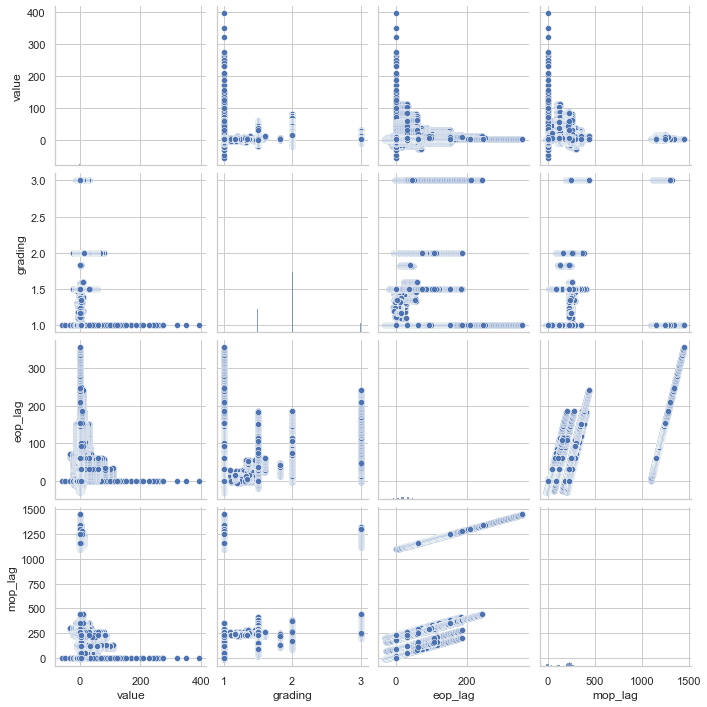

In [111]:
sns.pairplot(df[['value', 'grading','eop_lag', 'mop_lag']])
plt.show()

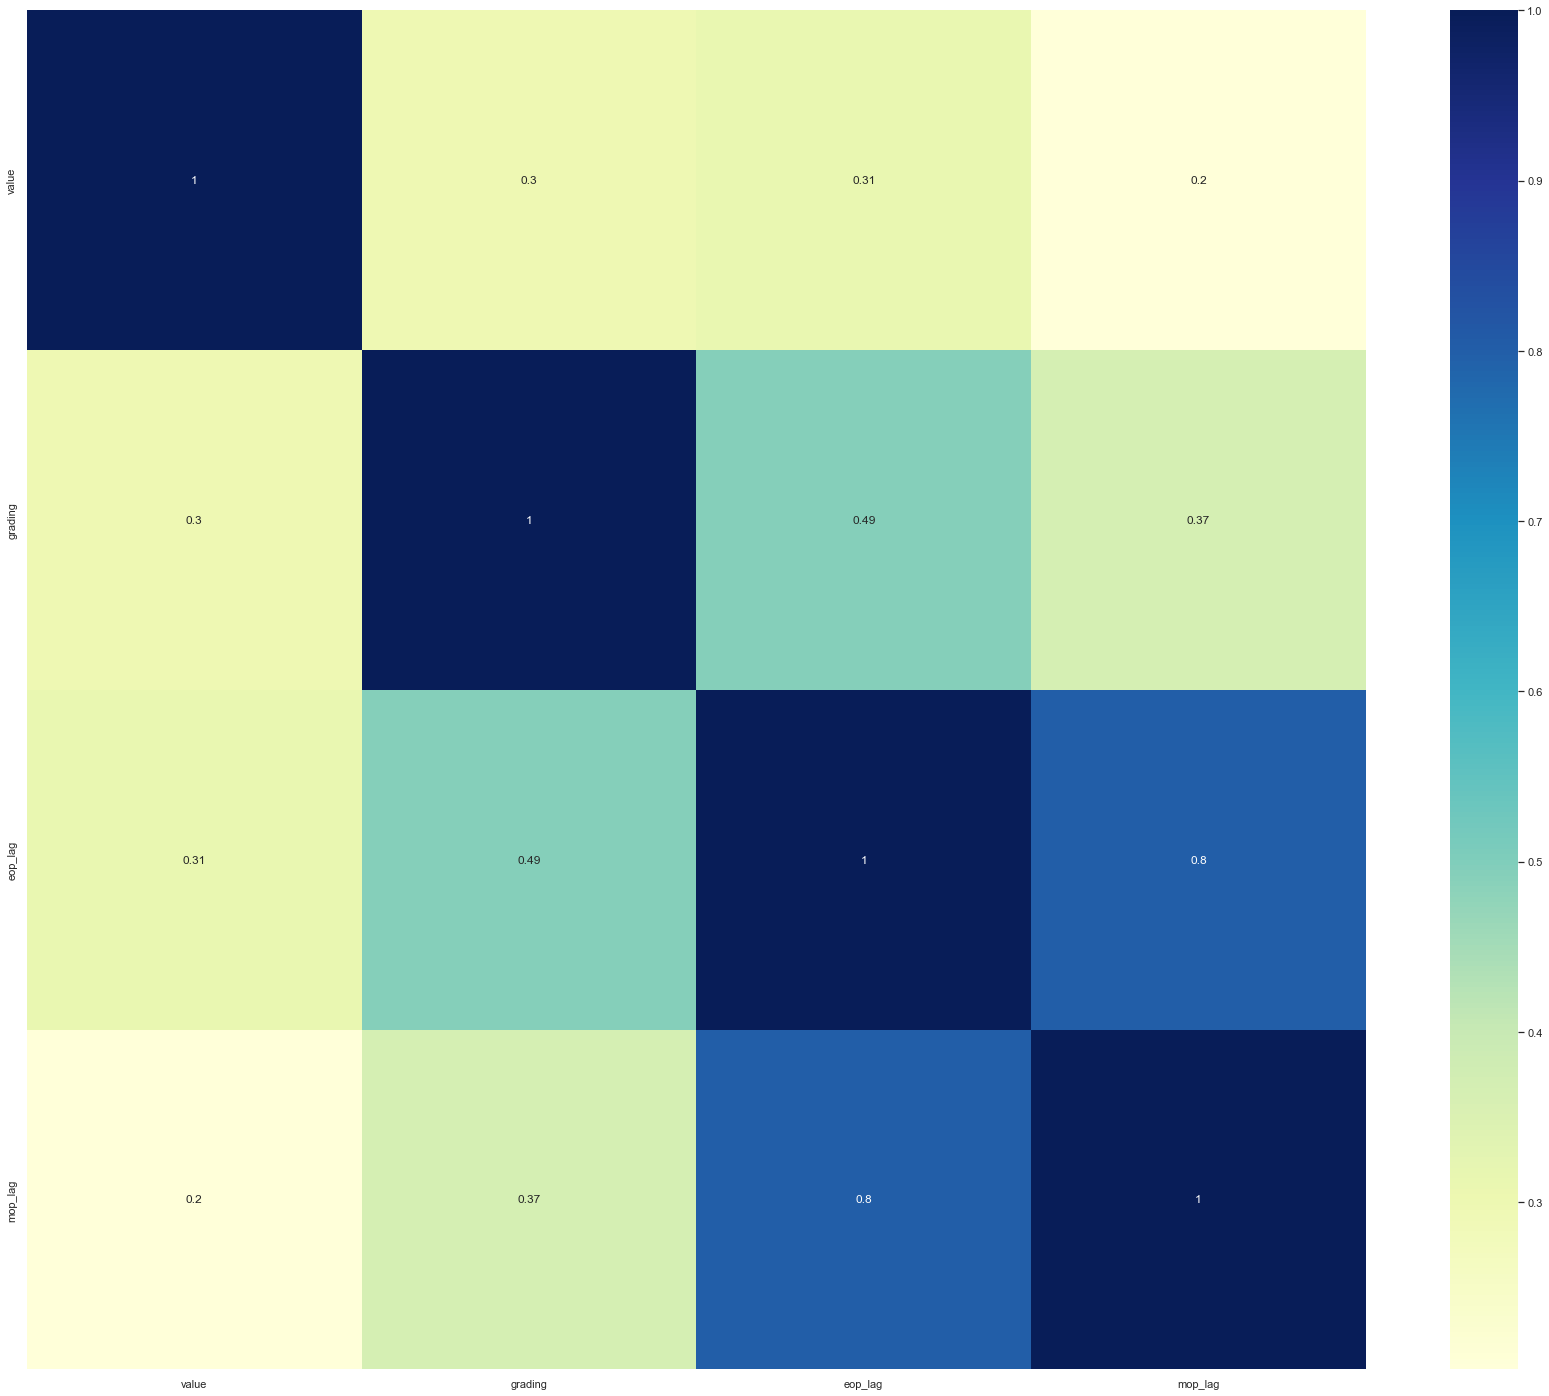

In [112]:
plt.figure(figsize = (30, 25))
sns.heatmap(df[['value', 'grading','eop_lag', 'mop_lag']].corr(), annot = True, cmap="YlGnBu")
plt.show()

<h1>An√°lisis exploratorio de datos</h1>

Resulta √∫til a√±adir una columna de teletipo como una concatenaci√≥n de cid y xcat. Esto acorta el c√≥digo para referencias a series temporales individuales.

In [113]:
df['ticker'] = df['cid'] + "_" + df["xcat"]
df["real_date"] =pd.to_datetime(df["real_date"])

Un histograma ofrece una representaci√≥n simplificada de la distribuci√≥n emp√≠rica pasada, mostrando el tama√±o de los contenedores que abarcan ciertos rangos de valores en lugar de los valores individuales. En Seaborn, la funci√≥n sns.histplot() nos permite realizar esta gr√°fica. Adem√°s, incluye una opci√≥n para superponer una estimaci√≥n de densidad del n√∫cleo, la cual se puede habilitar configurando el argumento kde en "True".

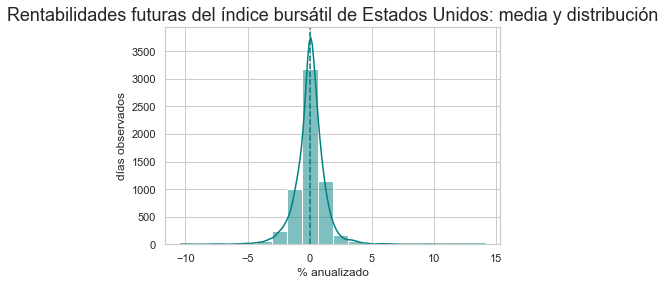

In [114]:
dfw = df.pivot_table(index='real_date', columns='ticker', values='value').replace(0, np.nan)  # llevar df a formato ancho
var = 'USD_EQXR_NSA'  # indicador especificado para analizar

col='teal'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})  #  elige la apariencia
sns.histplot(x = var, data=dfw, bins=20, kde=True, color=col)  # histograma con n√∫mero de contenedor personalizado y superposici√≥n de kde
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  # a√±adir l√≠nea vertical para la media

plt.title('Rentabilidades futuras del √≠ndice burs√°til de Estados Unidos: media y distribuci√≥n', fontsize=18)
plt.xlabel('% anualizado', fontsize=12)
plt.ylabel('d√≠as observados', fontsize=12)
plt.show()


El histograma de rentabilidades futuras del √≠ndice burs√°til de Estados Unidos representa la distribuci√≥n de las tasas de rendimiento esperadas dentro del per√≠odo de estudio (3 de enero de 2000 hasta el 31 de agosto de 2023). La media de esta distribuci√≥n representa el rendimiento promedio esperado, es decir, el promedio de todas las tasas de rendimiento calculadas entre d√≠as observados en el conjunto de datos hist√≥ricos.

Adem√°s, el histograma tambi√©n proporciona informaci√≥n sobre la dispersi√≥n de las tasas de rendimiento. Esto se representa visualmente mediante la forma y la dispersi√≥n de las barras en el histograma. Una distribuci√≥n m√°s ancha indica una mayor variabilidad en las tasas de rendimiento, mientras que una distribuci√≥n m√°s estrecha indica una variabilidad m√°s baja.

Si comparamos la gr√°fica previa (D√≥lar americano) con la siguiente gr√°fica (Euro), podemos notar que la distribuci√≥n del euro indica una mayor variabilidad en las tasas de rendimiento en comparaci√≥n con el d√≥lar.

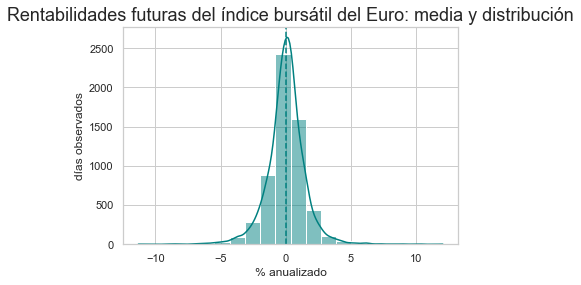

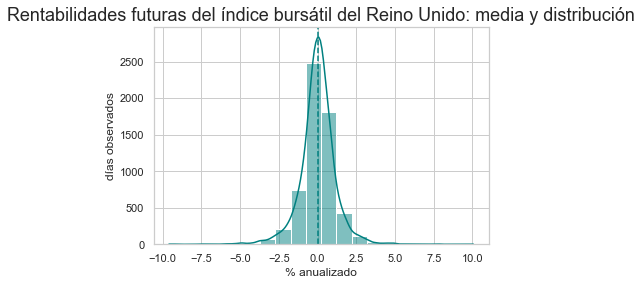

In [115]:
var = 'EUR_EQXR_NSA'  # indicador especificado para analizar

col='teal'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})  #  elige la apariencia
sns.histplot(x = var, data=dfw, bins=20, kde=True, color=col)  # histograma con n√∫mero de contenedor personalizado y superposici√≥n de kde
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  # a√±adir l√≠nea vertical para la media

plt.title('Rentabilidades futuras del √≠ndice burs√°til del Euro: media y distribuci√≥n', fontsize=18)
plt.xlabel('% anualizado', fontsize=12)
plt.ylabel('d√≠as observados', fontsize=12)
plt.show()

var = 'GBP_EQXR_NSA'  # indicador especificado para analizar

col='teal'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})  #  elige la apariencia
sns.histplot(x = var, data=dfw, bins=20, kde=True, color=col)  # histograma con n√∫mero de contenedor personalizado y superposici√≥n de kde
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  # a√±adir l√≠nea vertical para la media

plt.title('Rentabilidades futuras del √≠ndice burs√°til del Reino Unido: media y distribuci√≥n', fontsize=18)
plt.xlabel('% anualizado', fontsize=12)
plt.ylabel('d√≠as observados', fontsize=12)
plt.show()

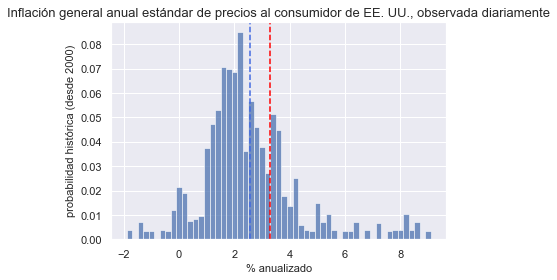

In [116]:
var = 'USD_CPIH_SA_P1M1ML12'  # indicador especificado para analizar

col='royalblue'
sns.set_theme(style='darkgrid', rc={'figure.figsize':(6, 4)})  
sns.histplot(x = var, data=dfw, binwidth=0.2, stat = 'probability') #histograma de probabilidad y ancho de contenedor preestablecidas
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  #a√±adir l√≠nea vertical para la media
plt.axvline(x= dfw[var].dropna().iloc[-1], color='red', linestyle='--')

plt.title('Inflaci√≥n general anual est√°ndar de precios al consumidor de EE. UU., observada diariamente', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)
plt.ylabel('probabilidad hist√≥rica (desde 2000)', fontsize=11) 
plt.show()

var = 'EUR_CPIH_SA_P1M1ML12'  # indicador especificado para analizar

col='royalblue'
sns.set_theme(style='darkgrid', rc={'figure.figsize':(6, 4)}) 
sns.histplot(x = var, data=dfw, binwidth=0.2, stat = 'probability')  #histograma de probabilidad y ancho de contenedor preestablecidas
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  #a√±adir l√≠nea vertical para la media
plt.axvline(x= dfw[var].dropna().iloc[-1], color='red', linestyle='--')  

plt.title('Inflaci√≥n general anual est√°ndar de precios al consumidor de Europa.', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)
plt.ylabel('probabilidad hist√≥rica (desde 2000)', fontsize=11)
plt.show()

var = 'GBP_CPIH_SA_P1M1ML12'  # indicador especificado para analizar

col='royalblue'
sns.set_theme(style='darkgrid', rc={'figure.figsize':(6, 4)}) 
sns.histplot(x = var, data=dfw, binwidth=0.2, stat = 'probability')  #histograma de probabilidad y ancho de contenedor preestablecidas
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  #a√±adir l√≠nea vertical para la media
plt.axvline(x= dfw[var].dropna().iloc[-1], color='red', linestyle='--')  

plt.title('Inflaci√≥n general anual est√°ndar de precios al consumidor del Reino Unido.', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)
plt.ylabel('probabilidad hist√≥rica (desde 2000)', fontsize=11)
plt.show()

El gr√°fico de inflaci√≥n anual de precios al consumidor muestra la variaci√≥n porcentual de los precios de los bienes y servicios durante el periodo de estudio. En el eje vertical se representa la probabilidad historica desde el 2000, mientras que en el eje horizontal se muestran los porcentajes anualizados.

Este tipo de gr√°fico es √∫til para observar y analizar la evoluci√≥n de la inflaci√≥n a lo largo de los a√±os, identificar tendencias a largo plazo y evaluar la estabilidad de los precios en una econom√≠a determinada. Tambi√©n puede ayudar a los responsables de la formulaci√≥n de pol√≠ticas y a los inversores a tomar decisiones informadas sobre cuestiones econ√≥micas y financieras.

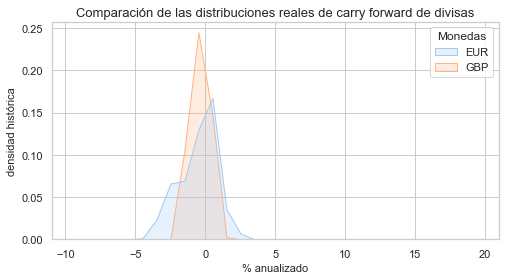

In [117]:
cids_sel = ['EUR', 'GBP'] # seleccionar un peque√±o grupo de secciones transversales
filt1 = df['xcat'] == 'FXCRR_NSA'  # elegir (filtrar) categor√≠a
filt2 = df['cid'].isin(cids_sel)  # elegir secciones transversales
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')  # establecer fecha de inicio
dfx = df[filt1 & filt2 & filt3][['value', 'cid']].replace(0, np.nan)

colors = 'pastel'  # choose color palette
sns.set_theme(style='whitegrid', rc={'figure.figsize':(8, 4)})
ax = sns.histplot(x='value', data=dfx,  
             hue='cid', element='poly', multiple='layer', 
             binrange=(-10, 20), binwidth = 1, stat='density', palette=colors)
plt.title('Comparaci√≥n de las distribuciones reales de carry forward de divisas', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)  
plt.ylabel('densidad hist√≥rica', fontsize=11)
leg = ax.axes.get_legend()
leg.set_title('Monedas')
plt.show()

La gr√°fica de comparaci√≥n de las distribuciones reales de carry forward de divisas muestra la distribuci√≥n de los retornos de las operaciones de carry forward en el mercado de divisas. Este tipo de gr√°fico compara dos o m√°s distribuciones de rendimientos reales de carry forward de diferentes divisas. En el eje horizontal del gr√°fico se representan los retornos de carry forward. El eje vertical muestra la frecuencia o la densidad de probabilidad de los retornos en cada intervalo.

La figura permite visualizar la forma y la dispersi√≥n de los rendimientos de carry forward para las divisas del Euro y la Libra Esterila, que es √∫til para los inversores y analistas financieros que desean comparar el rendimiento de diferentes operaciones de carry forward.

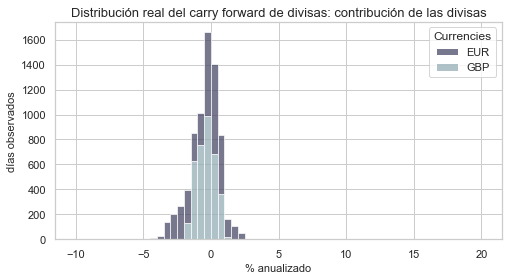

In [118]:
colors = 'bone'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(8, 4)})
ax = sns.histplot(x='value', data=dfx,  
             hue='cid', element='bars', multiple='stack', 
             binrange=(-10, 20), binwidth = 0.5, stat='count', palette=colors)

plt.title('Distribuci√≥n real del carry forward de divisas: contribuci√≥n de las divisas', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)  # set x-axis label
plt.ylabel('d√≠as observados', fontsize=11)  # set y-axis label
leg = ax.axes.get_legend()  # add legend box to plot to identify cross-sections
leg.set_title('Currencies')  # give title to legend box
plt.show()

En la gr√°fica de Distribuci√≥n Real del Carry Forward de Divisas: Contribuci√≥n de las Divisas se muestra c√≥mo se distribuyen los rendimientos reales del carry forward en el mercado de divisas, desglosados por las dos monedas del estudio. Cada moneda participante en las operaciones de carry forward se representa en el eje horizontal, mientras que en el eje vertical se muestra la densidad de probabilidad o la frecuencia de los rendimientos asociados a cada una de esas monedas.

El gr√°fico nos permite comprender la composici√≥n de los rendimientos del carry forward y para identificar qu√© monedas tienen el mayor impacto en la distribuci√≥n total de rendimientos. En esta podemos observar que ambas tienen impacto similares en la distribuci√≥n de rendimientos.

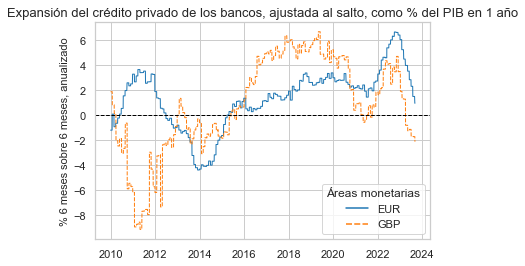

In [120]:
cids_sel = ['EUR', 'GBP']
filt1 = df['xcat'] == 'PCREDITGDP_SJA_D1M1ML12'
filt2 = df['cid'].isin(cids_sel)  # elegir secciones transversales
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')  # establecer fecha de inicio
dfx = df[filt1 & filt2 & filt3]
dfw = dfx.pivot(index=['real_date'], columns='cid', values='value')  # pivotar el marco de datos a la escala de tiempo com√∫n

colors='tab10'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
ax = sns.lineplot(data=dfw, estimator=None, palette=colors, linewidth=1) 

plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('Expansi√≥n del cr√©dito privado de los bancos, ajustada al salto, como % del PIB en 1 a√±o', fontsize=13) 
plt.xlabel('')  # set x-axis label
plt.ylabel('% 6 meses sobre 6 meses, anualizado', fontsize=11) 

leg = ax.axes.get_legend() 
leg.set_title('√Åreas monetarias')  

plt.show()

La gr√°fica de expansi√≥n del cr√©dito privado de los bancos muestra c√≥mo var√≠a la extensi√≥n del cr√©dito otorgado por los bancos al sector privado en relaci√≥n con el tama√±o de la econom√≠a durante el tiempo de estudio para las divisas del Euro y la Libra esterlina. El eje horizontal representa el tiempo, el eje vertical muestra el porcentaje del PIB que representa la expansi√≥n del cr√©dito privado ajustada al salto.

La expansi√≥n del cr√©dito privado se refiere al cambio en el volumen total de cr√©dito otorgado por los bancos al sector privado. Este cambio se ajusta al salto, lo que significa que se tienen en cuenta factores como las fluctuaciones estacionales o los eventos √∫nicos que podr√≠an distorsionar la tendencia general de la expansi√≥n del cr√©dito.

Al representar esta expansi√≥n del cr√©dito como porcentaje del PIB, podemos entender mejor su magnitud en relaci√≥n con el tama√±o total de la econom√≠a. Esto proporciona una perspectiva √∫til sobre el grado en que el cr√©dito privado est√° impulsando el crecimiento econ√≥mico o representando un riesgo potencial para la estabilidad financiera.

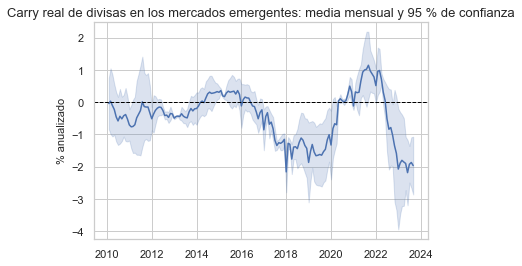

In [124]:
cids_sel = ['EUR', 'GBP']
filt1 = df['xcat'] == 'FXCRR_NSA'
filt2 = df['cid'].isin(cids_sel)  # elegir secciones transversales
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')  # establecer fecha de inicio

dfx = df[filt1 & filt2 & filt3]
dfm = dfx.groupby(['cid', 'xcat']).resample('M', on='real_date').mean()['value'].reset_index()  # convertir a promedios mensuales
dfw = dfm.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()  # pivotar al √≠ndice apropiado

colors='Paired'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
sns.lineplot(data=dfw, x='real_date', y='FXCRR_NSA', estimator='mean', errorbar=('ci', 95))  #trazar la media y su intervalo de confianza del 95%

plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('Carry real de divisas en los mercados emergentes: media mensual y 95 % de confianza', fontsize=13)
plt.xlabel('')  # set x-axis label
plt.ylabel('% anualizado', fontsize=11)  # set y-axis label

plt.show()

La gr√°fica de Carry Real de Divisas en los Mercados Emergentes, con la media mensual y un intervalo de confianza del 95%, muestra c√≥mo var√≠an los retornos reales de las estrategias de carry en los mercados emergentes a lo largo del tiempo, junto con una medida de la incertidumbre asociada con esas estimaciones. El eje horizontal representa el tiempo y el eje vertical muestra los retornos reales de las estrategias de carry en los dos mercados de estudio.

La l√≠nea o las barras representan la media mensual de los retornos reales de carry y el intervalo de confianza del 95% se muestra como una banda alrededor de la media, lo que indica la variabilidad en los retornos y proporciona una medida de la incertidumbre asociada con la estimaci√≥n de la media.

Esta gr√°fica nos permite evaluar el rendimiento y la volatilidad de las estrategias de carry en los el mercado del Euro y la Libra esterlina, as√≠ como identificar las tendencias a lo largo del tiempo.

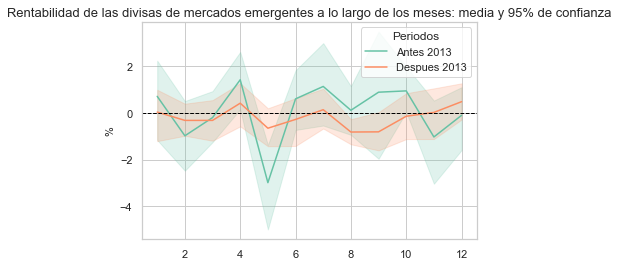

In [126]:

xcat_sel = 'FXXR_NSA'

filt1 = df['xcat'] == xcat_sel
filt2 = df['cid'].isin(cids_sel) 
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')  # establecer fecha de inicio
dfx = df[filt1 & filt2 & filt3]

dfm = dfx.groupby(['cid', 'xcat']).resample('M', on='real_date').sum()['value'].reset_index()  # medios mensuales
dfw = dfm.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()
dfw['month'] = dfw['real_date'].dt.month
dfw['period'] = 'Antes 2013'
dfw.loc[dfw['real_date'].dt.year > 2013, 'period'] = 'Despues 2013'

colors='Set2' 
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)}) 
ax = sns.lineplot(data=dfw, x='month', y=xcat_sel, hue='period', 
                  estimator='mean', errorbar=('ci', 95), palette=colors) 

plt.axhline(y=0, color='black', linestyle='--', lw=1) 
plt.title('Rentabilidad de las divisas de mercados emergentes a lo largo de los meses: media y 95% de confianza', fontsize=13) 
plt.xlabel('') 
plt.ylabel('%', fontsize=11) 
leg = ax.axes.get_legend() 
leg.set_title('Periodos')  

plt.show()

El gr√°fico de rentabilidad de las divisas de mercados emergentes a lo largo de los meses muestra c√≥mo ha variado el rendimiento de las divisas de los mercados emergentes en relaci√≥n con el tiempo, y c√≥mo esta variaci√≥n difiere entre dos per√≠odos de tiempo espec√≠ficos: antes y despu√©s de 2013. El eje horizontal representa los meses del a√±o, mientras que el eje vertical muestra la rentabilidad de las divisas de los mercados emergentes. La rentabilidad se calcula como el cambio porcentual en el valor de la divisa durante un mes determinado.

El gr√°fico incluye dos l√≠neaspara cada per√≠odo de tiempo: una para la media de la rentabilidad mensual y otra para el intervalo de confianza del 95%. Este intervalo de confianza indica la variabilidad en los rendimientos y proporciona una medida de la incertidumbre asociada con las estimaciones de la media.

Comparar los per√≠odos antes y despu√©s de 2013 permite visualizar si ha habido cambios significativos en la rentabilidad de las divisas de los mercados emergentes a lo largo del tiempo. Por ejemplo, podr√≠a revelar si hubo un cambio en la volatilidad o en la tendencia general de los rendimientos despu√©s de un evento particular en 2013.

Este tipo de gr√°fico es valioso para los inversores que desean comprender c√≥mo ha evolucionado el rendimiento de las divisas de los mercados de estudio a lo largo del tiempo y si hay diferencias significativas entre los per√≠odos espec√≠ficados.

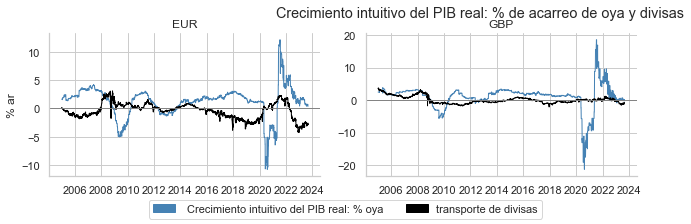

In [127]:
xcats_sel = ['INTRGDP_NSA_P1M1ML12_3MMA', 'FXCRR_NSA']
filt1 = df['xcat'].isin(xcats_sel)
filt2 = df['cid'].isin(cids_sel)
filt3 = df['real_date'] >= pd.to_datetime('2005-01-01')  
dfx = df[filt1 & filt2 & filt3]

colors=['steelblue', 'black']  
sns.set_theme(style='whitegrid', palette=colors) 
fg = sns.FacetGrid(dfx, col='cid', col_wrap=3, 
                   palette=colors, hue='xcat', hue_order=xcats_sel,  
                   height=3, aspect=1.5,  
                   sharey=False)  
fg.map_dataframe(sns.lineplot, x='real_date', y='value', errorbar=None, lw=1)  
fg.map(plt.axhline, y=0, c=".5", lw=0.75) 

fg.set_axis_labels('', '% ar')  
fg.set_titles(col_template='{col_name}')  
fg.fig.suptitle('Crecimiento intuitivo del PIB real: % de acarreo de oya y divisas', y=1)

name_to_color = {' Crecimiento intuitivo del PIB real: % oya': colors[0], 'transporte de divisas': colors[1]} 
patches = [mpl.patches.Patch(color=v, label=k) for k,v in name_to_color.items()] 
labels = name_to_color.keys() # series labels for legend box
fg.fig.legend(handles=patches, labels=labels, loc='lower center', ncol=2)

plt.show()

El gr√°fico de Crecimiento Intuitivo del PIB Real proporciona una representaci√≥n visual del crecimiento econ√≥mico ajustado por el efecto del tipo de cambio y la inflaci√≥n. El eje horizontal representa el tiempo, mientras que el eje vertical muestra el crecimiento del Producto Interno Bruto (PIB) real, que refleja el crecimiento econ√≥mico ajustado por la inflaci√≥n. Las l√≠neas en el gr√°fico representan dos medidas de crecimiento del PIB real: una medida utilizando el tipo de cambio de la moneda local  y otra medida utilizando el tipo de cambio de divisas (en relaci√≥n al d√≥lar estadounidense).

Al comparar estas dos medidas de crecimiento del PIB real, podemos evaluar c√≥mo afecta el tipo de cambio a la percepci√≥n del crecimiento econ√≥mico. Por ejemplo, si el crecimiento del PIB medido en moneda local es m√°s alto que el medido en divisas, esto sugiere que el crecimiento econ√≥mico se est√° sobreestimando debido a la depreciaci√≥n de la moneda local. Por otro lado, si el crecimiento del PIB medido en divisas es m√°s alto, esto sugiere que el crecimiento econ√≥mico se est√° subestimando debido a la apreciaci√≥n de la moneda local.

<h1>Modelo de Forecast</h1>

<h2>Modelos de regresi√≥n</h2>

Los modelos de regresi√≥n juegan un papel fundamental en las estrategias de inversi√≥n macro cuantitativa al permitir la evaluaci√≥n y predicci√≥n de variables clave que afectan a los mercados financieros y a la econom√≠a en su conjunto. Estos modelos emplean t√©cnicas estad√≠sticas para analizar la relaci√≥n entre m√∫ltiples variables independientes y una variable dependiente de inter√©s, lo que proporciona una base s√≥lida para la toma de decisiones en el √°mbito de la inversi√≥n.

In [129]:
xcats_sel = ['CPIH_SJA_P3M3ML3AR', 'EQXR_NSA']
filt1 = df['xcat'].isin(xcats_sel)
filt2 = df['cid'].isin(cids_sel)
filt3 = df['real_date'] >= pd.to_datetime('2000-01-01')
dfx = df[filt1 & filt2 & filt3]
dff = dfx.groupby(['cid', 'xcat']).resample('Q', on='real_date').mean()['value'].reset_index()
dfw = dff.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()

sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)}) 
sns.regplot(x=xcats_sel[0], y=xcats_sel[1], data=dfw, ci=98, order=1, 
            robust=False,  
            scatter_kws={'s': 20, 'alpha': 0.3, 'color':'lightgray'},
            line_kws={'lw' : 2, 'linestyle': '-.', 'color': 'salmon'}) 

plt.axhline(y=0, color='black', linestyle='--', lw=1) 
plt.axvline(x=0, color='black', linestyle='--', lw=1) 

plt.title('Inflaci√≥n subyacente y rentabilidad de los √≠ndices burs√°tiles (trimestral)', fontsize=13)
plt.xlabel('IPC subyacente, %6/6m ar', fontsize=11)
plt.ylabel('Rentabilidad promedio diaria del √≠ndice de acciones, %', fontsize=11)

plt.show()

La gr√°fica que muestra la relaci√≥n entre la inflaci√≥n subyacente y la rentabilidad de los √≠ndices burs√°tiles de manera trimestral, utilizando un diagrama de dispersi√≥n con una l√≠nea de regresi√≥n ajustada, muestra c√≥mo la inflaci√≥n influye en los rendimientos del mercado de valores en el transcurso del tiempo. El eje horizontal representa la inflaci√≥n subyacente, que es una medida de la inflaci√≥n. El eje vertical muestra la rentabilidad de los √≠ndices burs√°tiles.

El gr√°fico tambi√©n incluye una l√≠nea de regresi√≥n ajustada. La pendiente y la direcci√≥n de esta l√≠nea de regresi√≥n indican la naturaleza y la fuerza de la relaci√≥n entre las dos variables: si la l√≠nea es ascendente, indica una relaci√≥n positiva, mientras que una l√≠nea descendente indica una relaci√≥n negativa.

Este tipo de gr√°fico nos permite identificar patrones de la relaci√≥n entre la inflaci√≥n y los rendimientos del mercado de valores.

In [130]:

xcats_sel = ['FXCRR_NSA', 'FXXR_NSA']  
filt1 = df['xcat'].isin(xcats_sel)
dfx = df[filt1 & filt2 & filt3] 
dff = dfx.groupby(['cid', 'xcat']).resample('Q', on='real_date').mean()['value'].reset_index() 
filt4 = dff['xcat']==xcats_sel[0]
dff.loc[filt4, 'value'] = dff[filt4].groupby(['cid', 'xcat'])['value'].shift(1)
dfw = dff.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()

sns.set_theme(style='darkgrid', rc={'figure.figsize':(6, 4)})
sns.regplot(x=xcats_sel[0], y=xcats_sel[1], data=dfw, ci=95,  
            order=2, 
            scatter_kws={'s': 20, 'alpha': 0.3, 'color':'goldenrod'}, 
            line_kws={'lw' : 1, 'linestyle': '-', 'color': 'tab:blue'}) 

plt.axhline(y=0, color='tab:blue', linestyle='--', lw=1)
plt.axvline(x=0, color='tab:blue', linestyle='--', lw=1)

plt.title('Carry forward de divisas y rendimientos posteriores (promedios trimestrales)', fontsize=13)
plt.xlabel('Real forward carry, % ar', fontsize=11)
plt.ylabel('Rentabilidades a plazo de divisas, % ar', fontsize=11)

plt.show()

La gr√°fica muestra la relaci√≥n entre el carry forward de divisas y los rendimientos posteriores, utilizando promedios trimestrales y curvas de regresi√≥n polinomial con el argumento de orden, proporciona una representaci√≥n visual de c√≥mo el carry forward de divisas influye en los rendimientos futuros de manera trimestral, utilizando un modelo polinomial para ajustar la relaci√≥n entre estas dos variables.

El eje horizontal representa el carry forward de divisas, que es una estrategia de inversi√≥n que implica pedir prestado en una divisa con una tasa de inter√©s baja para invertir en otra con una tasa de inter√©s m√°s alta. El eje vertical muestra los rendimientos posteriores, que pueden expresarse como promedios trimestrales de rendimientos de inversiones realizadas despu√©s de llevar a cabo la estrategia de carry forward de divisas.

La gr√°fica incluye puntos dispersos que representan los pares de datos trimestrales: el carry forward de divisas y los rendimientos posteriores correspondientes. Estos puntos se distribuyen a lo largo del gr√°fico, y la forma en que se agrupan o dispersan proporciona informaci√≥n sobre la fuerza y la direcci√≥n de la relaci√≥n entre estas dos variables.

El uso de curvas de regresi√≥n polinomial permite capturar relaciones no lineales y proporciona una representaci√≥n m√°s flexible de la relaci√≥n entre el carry forward de divisas y los rendimientos posteriores, lo que puede ayudar a identificar patrones o tendencias m√°s complejas en los datos.

In [131]:

xcats_sel = ['FXCRR_NSA', 'RYLDIRS02Y_NSA']
filt1 = df['xcat'].isin(xcats_sel)

dfx = df[filt1 & filt2 & filt3]
dff = dfx.groupby(['cid', 'xcat']).resample('M', on='real_date').mean()['value'].reset_index()
dfw = dff.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()

sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
sns.regplot(x=xcats_sel[0], y=xcats_sel[1], data=dfw, 
            lowess=True,  
            marker='d', 
            scatter_kws={'s': 50, 'alpha': 0.2, 'color':'gray'},
            line_kws={'lw' : 1.5, 'color': 'black'}) 

plt.axhline(y=0, color='red', linestyle='--', lw=1)
plt.axvline(x=0, color='red', linestyle='--', lw=1)

plt.title('Carry forward real de divisas (promedios mensuales) y rendimiento real del IRS', fontsize=13)
plt.xlabel('Carry forward de divisas reales', fontsize=11)
plt.ylabel('Rendimiento real del IRS', fontsize=11)

plt.show()

El gr√°fico representa la relaci√≥n entre el carry forward real de divisas que es un indicador de la rentabilidad de las inversiones. Se utiliza un enfoque promedio mensual para calcular el carry forward y el rendimiento real del IRS, lo que permite capturar las tendencias a lo largo del tiempo de manera m√°s detallada.

Para representar esta relaci√≥n, se utilizan dos t√©cnicas diferentes. Primero, se aplica un modelo log√≠stico para variables binarias al rendimiento real del IRS. Esto implica convertir el rendimiento del IRS en una variable binaria que indica si se ha obtenido una ganancia o una p√©rdida en un determinado per√≠odo. Luego, se utiliza el carry forward real de divisas como predictor para este modelo log√≠stico, lo que permite evaluar c√≥mo afecta esta estrategia de inversi√≥n a la probabilidad de obtener una ganancia o una p√©rdida en el rendimiento del IRS.

Adem√°s, se aplica lowess (regresi√≥n lineal ponderada localmente) al carry forward real de divisas y al rendimiento real del IRS. Esta t√©cnica proporciona una representaci√≥n suave y flexible de la relaci√≥n entre estas dos variables, permitiendo capturar posibles relaciones no lineales y tendencias a corto plazo en los datos. La regresi√≥n lineal ponderada localmente ajusta una l√≠nea a los datos en cada punto, ponderando m√°s los puntos cercanos y menos los puntos distantes, lo que permite una adaptaci√≥n flexible a la forma de los datos sin imponer una estructura r√≠gida.

<h2>An√°lisis de series temporales</h2>

El suavizado exponencial es una t√©cnica valiosa para identificar tendencias en datos ruidosos y capturar los patrones subyacentes. Consiste en utilizar un promedio m√≥vil que otorga pesos m√°s altos a los valores m√°s recientes y asigna pesos gradualmente decrecientes a los valores medidos m√°s antiguos. El valor num√©rico del par√°metro de suavizado, ùõº, se establece entre 0 y 1 y controla la disminuci√≥n de los pesos hacia el pasado. Un valor m√°s peque√±o (m√°s cercano a 0) crea una l√≠nea m√°s suave (cambios m√°s lentos) similar a un promedio m√≥vil con un gran n√∫mero de per√≠odos. Un valor alto para alfa sigue de cerca los datos al dar m√°s peso a los datos recientes. Esto crea una l√≠nea m√°s irregular porque los datos actuales tienen un peso m√°s alto, lo que reduce el grado de promediado de los datos m√°s antiguos. En el caso extremo de ùõº = 1, la serie temporal resultante es equivalente a la serie temporal real. La elecci√≥n del par√°metro de suavizado ùõº depende del equilibrio deseado entre la capacidad de respuesta a los datos recientes y el nivel de suavizado. En el ejemplo a continuaci√≥n, elegimos 2 valores de ùõº para demostrar el efecto.

A diferencia de los promedios m√≥viles con una ventana de estimaci√≥n fija, el suavizado exponencial no corta la ventana de observaci√≥n, por lo que la estimaci√≥n se basa en ventanas en expansi√≥n. Sin embargo, en la pr√°ctica, la importancia de las observaciones anteriores disminuye exponencialmente, como en el ejemplo anterior con un valor de alfa de 0.13, donde la mitad de los pesos se utilizan solo para las √∫ltimas 5 observaciones (en datos diarios, d√≠as).

En el contexto del conjunto de datos que utilizamos, el suavizado exponencial puede ser utilizado como una estimaci√≥n de valores esperados lentos o adaptativos, en lugar de tendencias. Los datos cuantamentales siempre registran el estado de la informaci√≥n m√°s reciente del p√∫blico con respecto a un concepto econ√≥mico y financiero al final de un d√≠a dado.

Por lo tanto, los indicadores cuantamentales son representativos de un participante de mercado atento. Sin embargo, muchos agentes en la econom√≠a o incluso en los mercados pueden no actualizarse sobre los estados econ√≥micos diariamente. Por lo tanto, el estado promedio de la informaci√≥n p√∫blica o del mercado puede estar representado por un promedio m√≥vil exponencial, donde la mitad del tiempo indica el tiempo transcurrido hasta que la mitad de la poblaci√≥n se haya puesto al d√≠a con el estado de informaci√≥n m√°s reciente.

Para correr los algoritmos del suavizado exponencial primero debemos cargar la libreria correspondiente en Python.


In [174]:
from statsmodels.tsa.api import SimpleExpSmoothing
import warnings

In [187]:
cids_sel = ['EUR', 'GBP']
xcat_sel = "INTRGDPv5Y_NSA_P1M1ML12_3MMA"

filt1 = df['xcat'] == xcat_sel
filt2 = df['cid'].isin(cids_sel) 
filt3 = df['real_date'] >= pd.to_datetime('2002-01-01')

dfx = df[filt1 & filt2 & filt3]


Nos interesa realizar tres ejemplos de suavizado exponencial simple.

En el primer ejemplo, ema003, no aplicamos ninguna optimizaci√≥n basada en datos, sino que proporcionamos al modelo el par√°metro ùõº = 0.03. Esto implica un tiempo medio de alrededor de 23 d√≠as, lo que indica que el promedio m√≥vil exponencial simula un mercado donde el 50% de los agentes han actualizado su percepci√≥n en los √∫ltimos 23 d√≠as, aproximadamente una vez al mes. Utilizando la f√≥rmula mencionada, ùúè = -ln(2) / ln(1 - ùõº) ‚âà 22.8, lo que significa que las √∫ltimas 22.8 observaciones contienen la mitad de los pesos totales del promedio m√≥vil.

En el segundo ejemplo, ema013, de manera similar, seleccionamos el decaimiento del peso por adelantado pero con ùõº = 0.13, lo que implica un tiempo medio de aproximadamente 5 d√≠as laborables (una semana).

En el tercer ejemplo, emaop, permitimos que statsmodels optimice el decaimiento del peso en funci√≥n de los datos anteriores, minimizando la suma de los errores cuadrados de las predicciones a un d√≠a de anticipaci√≥n. Para los estados de informaci√≥n de datos econ√≥micos, podr√≠a argumentarse que se debe aplicar primero una conversi√≥n de frecuencia antes de aplicar este m√©todo, para obtener la serie econ√≥mica publicada en su frecuencia de actualizaci√≥n nativa en lugar de valores diarios. Sin embargo, por simplicidad, comenzamos aplicando el m√©todo a estados de informaci√≥n diaria.

En los ejemplos ema003 y ema013, el argumento "heur√≠stico" se refiere a la elecci√≥n de los valores iniciales; no se basa en un principio estad√≠stico particular, sino que utiliza un enfoque razonable que se ha encontrado que funciona bien en la pr√°ctica.

In [188]:
alpha_003 = 0.03
alpha_013 = 0.13

dfw = dfx.pivot_table(index="real_date", columns="cid", values="value").replace(
    0, np.nan
)  # amplia serie temporal df

dfema = pd.DataFrame(columns=["cid", "xcat", "real_date", "value"])

for cid in cids_sel:

    ema003 = SimpleExpSmoothing(
        dfw[cid].dropna(), initialization_method="heuristic"
    ).fit(smoothing_level=alpha_003, optimized=False)

    ema013 = SimpleExpSmoothing(
        dfw[cid].dropna(), initialization_method="heuristic"
    ).fit(smoothing_level=alpha_013, optimized=False)

    emaop = SimpleExpSmoothing(
        dfw[cid].dropna(), initialization_method="estimated"
    ).fit()

    df003 = ema003.fittedvalues.to_frame().reset_index().rename(columns={0: "value"})
    df003["xcat"] = xcat_sel + "_EMA003"

    df013 = ema013.fittedvalues.to_frame().reset_index().rename(columns={0: "value"})
    df013["xcat"] = xcat_sel + "_EMA013"

    dfop = emaop.fittedvalues.to_frame().reset_index().rename(columns={0: "value"})
    dfop["xcat"] = xcat_sel + "_EMAOP"
    Opt_alpha = emaop.params["smoothing_level"].round(4)

    dfc = pd.concat([df003, df013, dfop])

    dfc["cid"] = cid
    dfc = dfc[list(dfema.columns)]
    dfema = dfema.append(dfc)


dfx["xcat"] = xcat_sel
dfema = dfema.append(dfx[list(dfema.columns)])

dfemx = dfema[dfema["real_date"] >= pd.to_datetime("2021-01-01")]

xcats_ema = [xcat_sel + x for x in ["", "_EMA003", "_EMA013", "_EMAOP"]]
colors = ["black", "steelblue", "red", "yellow"]


sns.set_theme(style="whitegrid", palette=colors)
fg = sns.FacetGrid(
    dfemx,
    col="cid",
    col_wrap=1,
    palette=colors,
    hue="xcat",
    hue_order=xcats_ema,
    height=4,
    aspect=2.5, 
    sharey=False,
) 

fg.map_dataframe(
    sns.lineplot, x="real_date", y="value", errorbar=None, lw=1
) 

fg.set_axis_labels("", "% ")  
fg.set_titles(col_template="{col_name}") 
fg.fig.suptitle(
    f"Suavizado exponencial simple {xcat_sel}", y=1.02
)  

name_to_color = {
    "tasa de inter√©s real a 5 a√±os": colors[0],
    f"alpha= {alpha_003}": colors[1],
    f"alpha= {alpha_013}": colors[2],
    "alfa optimizado": colors[3],
}

patches = [
    mpl.patches.Patch(color=v, label=k) for k, v in name_to_color.items()
] 
labels = name_to_color.keys()  
fg.fig.legend(
    handles=patches, labels=labels, loc="lower center", ncol=2
)  

fg.fig.subplots_adjust(bottom=0.15) 
plt.show()

La serie temporal de los valores de alfa seleccionados es apropiada para realizar pruebas retrospectivas y suaviza claramente los datos originales, eliminando el ruido. Sin embargo, los promedios m√≥viles exponenciales optimizados calculan los valores suavizados pasados en funci√≥n de la informaci√≥n FUTURA. Estas series temporales no representan estados de informaci√≥n y, por lo tanto, no son adecuadas para realizar pruebas retrospectivas.

La forma correcta de calcular los promedios m√≥viles exponenciales optimizados es reestimar secuencialmente el factor de suavizado y calcular el indicador promediado en cada momento utilizando el par√°metro que era √≥ptimo en ese momento. Esto equivale al uso de series temporales de promedios m√≥viles exponencialmente suavizadas.

Un enfoque m√°s realista en muchos casos ser√≠a ejecutar la estimaci√≥n suavizada para un marco de datos diario, utilizando fechas de fin de mes para estimar el valor √≥ptimo de ùõº. Luego, aplicamos este valor optimizado de alfa a una serie temporal correspondiente al final del pr√≥ximo mes.

In [190]:
filt1 = df["xcat"] == "EQXR_VT10"
filt2 = df["cid"] == "GBP"
dfx = (
    df[filt1 & filt2].loc[:, ["real_date", "value"]].dropna().set_index("real_date")
).rename(
    columns={"value": "EQXR_VT10"}
)  # serie temporal df
dfx.index = pd.to_datetime(dfx.index)
dfx = dfx[pd.Timestamp("2020-01-01") :]


np.diff(np.array(dfx.index.month))

month_end = list(np.diff(np.array(dfx.index.month)) != 0) + [True]

# contar cu√°ntos fines de mes tenemos en el marco de datos diario
count_month_end = sum(month_end)
dfxo = dfx.copy().replace(to_replace=0, method="bfill")

# 1. definir el per√≠odo de tiempo diario inicial hasta el final del segundo mes completo
dfema = dfx.loc[
    : dfx.loc[
        month_end,
    ].index[1]
]

# 2. aplicar suavizado de exp simple optimizado al per√≠odo de tiempo inicial
emaop = SimpleExpSmoothing(dfema.dropna(), initialization_method="estimated").fit()
Opt_alpha = emaop.params["smoothing_level"]

# 3. rellenar el marco de datos del marcador de posici√≥n con nuevos valores
dfxo["smoothened_value"] = emaop.fittedvalues.to_frame()

# 4. Aplicar una l√≥gica similar al resto de la serie de datos mediante un bucle.:


for i in range(1, count_month_end - 1):
    dfema1 = dfxo["EQXR_VT10"].loc[
        dfx.loc[
            month_end,
        ]
        .index[i - 1] : dfx.loc[
            month_end,
        ]
        .index[i]
    ]

    emaop1 = SimpleExpSmoothing(dfema1, initialization_method="heuristic").fit(
        smoothing_level=Opt_alpha, optimized=False
    )

    dfop1 = emaop1.fittedvalues.to_frame()

    dfxo.loc[dfxo.index.isin(dfop1.index), ["smoothened_value"]] = dfop1[[0]].values

    dfema2 = dfxo["EQXR_VT10"].loc[
        : dfx.loc[
            month_end,
        ].index[i - 1]
    ]

    emaop1 = SimpleExpSmoothing(dfema2, initialization_method="estimated").fit()
    Opt_alpha = emaop1.params["smoothing_level"]


sns.set(rc={"figure.figsize": (15, 5)})

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(
    data=dfxo,
    x="real_date",
    y="EQXR_VT10",
    label="Rendimientos futuros del √≠ndice de acciones, diario",
    ax=ax,
)
sns.lineplot(
    data=dfxo,
    x="real_date",
    y="smoothened_value",
    label="Suavizado vintage: utilizando alfa optimizado de meses anteriores",
    ax=ax,
)
plt.title("Rentabilidades futuras del √≠ndice burs√°til y series antiguas optimizadas y suavizadas - GBP")

plt.plot(dfxo)

warnings.filterwarnings('ignore')

Para generar el gr√°fico anterior, a√±adimos la secci√≥n correspondiente al mes siguiente, donde nuevamente estimamos nuevos valores √≥ptimos de ùõº y los aplicamos a los datos diarios del siguiente mes. Esta gr√°fica representa las Rentabilidades futuras del √≠ndice burs√°til y las series antiguas optimizadas y suavizadas para la Libra Esterlina.

La raz√≥n de las l√≠neas planas en el gr√°fico se debe a que el suavizado exponencial simple tiene una funci√≥n de pron√≥stico "plana". Por lo tanto, todos los pron√≥sticos toman el mismo valor, igual al componente del √∫ltimo nivel.

Repetimos el codigo para visualizar as Rentabilidades futuras del √≠ndice burs√°til y las series antiguas optimizadas y suavizadas para el Euro.

In [191]:
filt1 = df["xcat"] == "EQXR_VT10"
filt2 = df["cid"] == "EUR"
dfx = (
    df[filt1 & filt2].loc[:, ["real_date", "value"]].dropna().set_index("real_date")
).rename(
    columns={"value": "EQXR_VT10"}
)  # serie temporal df
dfx.index = pd.to_datetime(dfx.index)
dfx = dfx[pd.Timestamp("2020-01-01") :]


np.diff(np.array(dfx.index.month))

month_end = list(np.diff(np.array(dfx.index.month)) != 0) + [True]

# contar cu√°ntos fines de mes tenemos en el marco de datos diario
count_month_end = sum(month_end)
dfxo = dfx.copy().replace(to_replace=0, method="bfill")

# 1. definir el per√≠odo de tiempo diario inicial hasta el final del segundo mes completo
dfema = dfx.loc[
    : dfx.loc[
        month_end,
    ].index[1]
]

# 2. aplicar suavizado de exp simple optimizado al per√≠odo de tiempo inicial
emaop = SimpleExpSmoothing(dfema.dropna(), initialization_method="estimated").fit()
Opt_alpha = emaop.params["smoothing_level"]

# 3. rellenar el marco de datos del marcador de posici√≥n con nuevos valores
dfxo["smoothened_value"] = emaop.fittedvalues.to_frame()

# 4. Aplicar una l√≥gica similar al resto de la serie de datos mediante un bucle.:


for i in range(1, count_month_end - 1):
    dfema1 = dfxo["EQXR_VT10"].loc[
        dfx.loc[
            month_end,
        ]
        .index[i - 1] : dfx.loc[
            month_end,
        ]
        .index[i]
    ]

    emaop1 = SimpleExpSmoothing(dfema1, initialization_method="heuristic").fit(
        smoothing_level=Opt_alpha, optimized=False
    )

    dfop1 = emaop1.fittedvalues.to_frame()

    dfxo.loc[dfxo.index.isin(dfop1.index), ["smoothened_value"]] = dfop1[[0]].values

    dfema2 = dfxo["EQXR_VT10"].loc[
        : dfx.loc[
            month_end,
        ].index[i - 1]
    ]

    emaop1 = SimpleExpSmoothing(dfema2, initialization_method="estimated").fit()
    Opt_alpha = emaop1.params["smoothing_level"]


sns.set(rc={"figure.figsize": (15, 5)})

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(
    data=dfxo,
    x="real_date",
    y="EQXR_VT10",
    label="Rendimientos futuros del √≠ndice de acciones, diario",
    ax=ax,
)
sns.lineplot(
    data=dfxo,
    x="real_date",
    y="smoothened_value",
    label="Suavizado vintage: utilizando alfa optimizado de meses anteriores",
    ax=ax,
)
plt.title("Rentabilidades futuras del √≠ndice burs√°til y series antiguas optimizadas y suavizadas - EUR")

plt.plot(dfxo)

warnings.filterwarnings('ignore')

<h1>Conclusi√≥n</h1>

Las estrategias de inversi√≥n macro cuantitativa se basan en el an√°lisis exhaustivo de datos macroecon√≥micos y financieros para tomar decisiones informadas en el mercado. Estas estrategias emplean modelos matem√°ticos y algoritmos para identificar patrones y oportunidades en los mercados financieros, centr√°ndose en factores como tasas de inter√©s, inflaci√≥n, pol√≠ticas gubernamentales y otros indicadores econ√≥micos.

Hist√≥ricamente, los datos cuantitativos han presentado desaf√≠os significativos, incluida la falta de estandarizaci√≥n y la presencia de errores y omisiones. Sin embargo, con el uso de distintas t√©cnicas estad√≠sticas, es posible analizar y comprender las relaciones entre m√∫ltiples variables macroecon√≥micas a lo largo del tiempo.

En nuestros an√°lisis, nos concentramos en la aplicaci√≥n de diversos modelos de forecasting a conjuntos de datos macro-cuantitativos. Estos conjuntos de datos abarcan una amplia gama de indicadores econ√≥micos clave, lo que nos permite comprender mejor las interconexiones y relaciones globales que influyen en los mercados financieros.

Por ejemplo, al aplicar el suavizado exponencial, podemos identificar tendencias en los datos y suavizar el ruido, lo que nos permite realizar pron√≥sticos m√°s precisos. A trav√©s de ejemplos como ema003 y ema013, exploramos diferentes enfoques para el suavizado exponencial, desde la selecci√≥n de par√°metros fijos hasta la optimizaci√≥n basada en datos.

Es importante tener en cuenta que el uso de series temporales optimizadas para el suavizado exponencial implica reestimar secuencialmente los par√°metros y aplicarlos a datos futuros, lo que nos permite obtener pron√≥sticos m√°s precisos y adaptativos.

En resumen, al combinar el an√°lisis detallado de datos macro-cuantitativos con t√©cnicas de modelado avanzadas, podemos tomar decisiones de inversi√≥n m√°s informadas y aprovechar las oportunidades en los mercados financieros globales.

<h1>Referencia</h1>

JPMAQS Quantamental Indicators. (2023, December 14). <a href='https://www.kaggle.com/datasets/macrosynergy/fixed-income-returns-and-macro-trends'>Kaggle</a>.

Simple exponential smoothing | Forecasting: Principles¬†and¬†Practice (2nd¬†ed). (n.d.). https://otexts.com/fpp2/ses.html